# Workshop 03 - OpenTURNS

```{custom_download_link} ./openturns.ipynb
:text: "download notebook"
:replace_default: "True"
```

```{note}

This Workshop introduces OpenTURNS, a Python package for reliability calculations.

This page is _not_ interactive (OpenTURNS doesn't work with the interactive feature).

To complete this workshop, do the following:
1. Read the page
1. Download this page as a notebook
2. Set up a Python environment with `openturns`, `numpy` and `matplotlib` (you can use Anaconda or a Python Virtual Environment, as introduced [here](https://tudelft-citg.github.io/HOS-prob-design-24/software/))
3. Execute the cells to make sure you have the OPENTurns Python package running
4. Ponder the nice ways the package lets you complete reliability analyses

If you complete these steps you will be ready to go for the in-class activities next week!
```

## Introduction

At the moment, this chapter is just a collection of notes from Robert made while using OpenTURNS. The idea is to use it as:
* an introduction to the package OpenTURNS for a new user
* a quick reference for setting up simple analyses
* a help file for students in courses related to probabilistic design at TU Delft

What's really nice about the package OpenTURNS?
* it has a lot of great analysis tools and a lot of options for modeling probability distributions
* everything is documented well, the code is accessible
* detailed mathematical/theoretical representations, along with a long list of publications
* the classes are robust and make a lot of things very easy!

Disadvantages?
* there's a bit of a learning curve (hence this document)
* doesn't follow formatting conventions like PEP-8
* installation of the Python package is sometimes problematic if you are not mindful of package management

### Overview of this document

1. Getting started
2. Quick notes: installation, import, sample and point manipulation
3. Example: reliability of a simple slope
4. Example: reliability of a thingamajig
5. Setting up a function and random vectors
6. Reliability analysis of thingamajig with symbolic function (FORM)

Sections 1-4 focus on the structures and methods that make OpenTURNS a powerful probabilistic computational tool, and the examples analyze reliability by directly evaluating the PDF of the limit state function. Sections 5 and 6 illustrate how a Python function or symbolic function can be defined using OpenTURNS, which may be more applicable to problems where the limit-state functions become more complex. 

I (Robert) am not a very experience Python user, and my slow progression along the 'learning curve' had a lot to do with making errors in generic Python syntax, but also because I skipped reading the explanations of the Point and Sample classes in OpenTURNS, which work in special ways. If you are having trouble making things work in OT, go back and spend some more time on the links and examples in Sections 1 and 2.

## Getting started

It's easiest to just download 'exe' file from [github][install], which installs the package (it worked for me with Anaconda on Windows - choose the right system and Python configuration). See the [OT website][installOT] for other cases.

The default [home page][0] is a good place to start exploring, and then is a handy way to find things (along with the quick search). The examples page gives a good overview of key parts of the package. This is important for getting familiar with the special features that OT has, listed below:
* Point and [Sample][api-sample] classes: two objects which are essential for using OT and taking advantage of it's features, but also something that was confusing when I started by jumped straight to examples, so definitely *read the [explanation][ps] first!*
* in order to use points and classes like vectors and matrices, they need to be converted to arrays with numpy
* distributions are very easy to specify, and it's very easy to sample from them
* functions are also very easy to specify, and because it's so easy to define distributions, it's also very easy to evaluate them
* many automatic graphing methods

The best way to learn this stuff is to start at the [examples page][ex], and don't skip the topics in [data analysis][data], there are some fundamental lessons there.

Distributions are listed [here][dist].

[0]:http://openturns.github.io/
[start]:http://openturns.github.io/openturns/master/contents.html
[installOT]:http://openturns.github.io/openturns/master/install.html
[install]:https://github.com/openturns/build/releases
[ps]: http://openturns.github.io/openturns/master/auto_data_analysis/manage_data_and_samples/plot_quick_start_point_and_sample.html#sphx-glr-auto-data-analysis-manage-data-and-samples-plot-quick-start-point-and-sample-py
[ex]: http://openturns.github.io/openturns/master/examples/examples.html
[data]: http://openturns.github.io/openturns/master/auto_data_analysis/index.html
[dist]: http://openturns.github.io/openturns/master/user_manual/probabilistic_modelling.html#parametric-distributions
[api-sample]: https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.Sample.html

## Quick notes: installation, import, sample and point manipulation
The sample and point classes make it very easy to get samples from a probability distribtuion. The code cells below show how easy it is to define a parametric distribution and draw samples - something that can be done in other Python packages, of course, but these classes are designed to work seemlessly with the more advanced probabilistic methods available in OpenTURNS. This section has the following examples:
* standard packages to import 
* quick example of sample and point manipulation, with numpy
* quick example of sample and point manipulation, without numpy

In [1]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt
ot.Log.Show(ot.Log.NONE)

In [2]:
import numpy as np

x = ot.Normal(4).getSample(6)
print('OpenTurns Sample:\n\n', x)

y = np.array(x)
print('\nOpenTurns Sample converted to numpy array:\n\n', y)

OpenTurns Sample:

     [ X0         X1         X2         X3         ]
0 : [  0.608202  -1.26617   -0.438266   1.20548   ]
1 : [ -2.18139    0.350042  -0.355007   1.43725   ]
2 : [  0.810668   0.793156  -0.470526   0.261018  ]
3 : [ -2.29006   -1.28289   -1.31178   -0.0907838 ]
4 : [  0.995793  -0.139453  -0.560206   0.44549   ]
5 : [  0.322925   0.445785  -1.03808   -0.856712  ]

OpenTurns Sample converted to numpy array:

 [[ 0.60820165 -1.2661731  -0.43826562  1.2054782 ]
 [-2.18138523  0.35004209 -0.35500705  1.43724931]
 [ 0.81066798  0.79315601 -0.4705256   0.26101794]
 [-2.29006198 -1.28288529 -1.31178112 -0.09078383]
 [ 0.99579323 -0.13945282 -0.5602056   0.4454897 ]
 [ 0.32292503  0.4457853  -1.03807659 -0.85671228]]


In [3]:
sample = ot.Normal(4).getSample(6)
print('OpenTurns Sample:\n\n', sample)

OpenTurns Sample:

     [ X0         X1         X2         X3         ]
0 : [  0.473617  -0.125498   0.351418   1.78236   ]
1 : [  0.0702074 -0.781366  -0.721533  -0.241223  ]
2 : [ -1.78796    0.40136    1.36783    1.00434   ]
3 : [  0.741548  -0.0436123  0.539345   0.29995   ]
4 : [  0.407717  -0.485112  -0.382992  -0.752817  ]
5 : [  0.257926   1.96876   -0.671291   1.85579   ]


It's possible to get one value from a point

In [5]:
print('The second point in the above point is: {0:.3f}'.format(sample[1][1]))

The second point in the above point is: -0.781


Thus it's also possible to export a point as a list since Samples and Points have list comprehension.

In [6]:
pythonlist = [value for value in sample[1]]
print(f'The second Point has values: ',*[f'{pythonlist:.3f}' for pythonlist in pythonlist])
print('but now it has type ',type(pythonlist))

The second Point has values:  0.070 -0.781 -0.722 -0.241
but now it has type  <class 'list'>


It's harder to access all points for one of the dimensions from a sample, but fortunately, a Sample has a method asPoint() which gives the values of a 1D sample as a point!

In [7]:
sampleaspoint = sample[:,0].asPoint()
print('\nValues for the first variable are: ',*[f'{i:.3f}' for i in sampleaspoint])
print('with type ',type(sampleaspoint))


Values for the first variable are:  0.474 0.070 -1.788 0.742 0.408 0.258
with type  <class 'openturns.typ.Point'>


## Example: reliability of a simple slope

This is from Baecher and Christian (2003), also used in Moss (2020).

Simple wedge failure with self-weight balanced by cohesion $c$. Clacluate load as $S=0.25\gamma H$, where $h=10$ m. Distributions are normal, where $\gamma\sim$N($\mu_\gamma=20$ kPa, $\sigma_\gamma=2$ kPa) and $c\sim$N($\mu_c=100$ kPa, $\sigma_c=30$ kPa). 

$Z=R-S=c-0.25\gamma H$

Results: $\beta=1.64$ and $p_f=0.051$.

Start by defining the random variables and plotting the distributions.

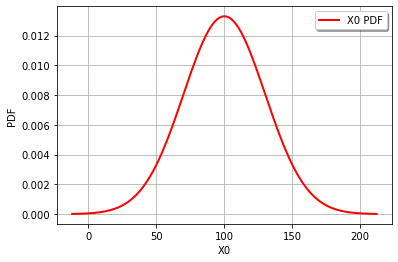

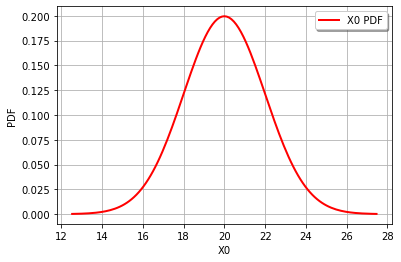

In [8]:
cohesion = ot.Normal(100,30)
gravity = ot.Normal(20,2)
height = 10

graph = cohesion.drawPDF()
view = viewer.View(graph)
graph = gravity.drawPDF()
view = viewer.View(graph)


It's also easy to draw the CDF or inverse CDF and make a logarithmic axis. [This page][graphs] is a good starting point for formatting hints.

[graphs]: https://openturns.github.io/openturns/master/examples/graphs/graphs_basics.html

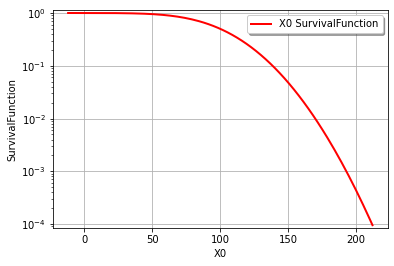

In [9]:
graph = cohesion.drawSurvivalFunction()
graph.setLogScale(ot.GraphImplementation.LOGY)
view = viewer.View(graph)

It's actually very easy to combine distributions in OT. The distribution for a function of random variables (i.e., theoretically and as an OT distribution class) can be evaluated as if they were normal Python variables for addition, multiplication and division using the distributions or scalar values. Thus, for our example, we can combine the distributions for $R$ and $S$ directly and solve for the reliability index exactly with just 2 lines. *Note: this isn't just limited to normal distributions, OT can do a lot. See [quick start][dist-start] and [distribution manipulation][dist-manip] example pages. See the [transformation page][dist-trans] for a list of functions that can be used to transform distributions (e.g., you can't use $x^2$, but must use `sqr(x)`). These functions are methods in the distribution class.*

[dist-start]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_quick_start_guide_distributions.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-quick-start-guide-distributions-py
[dist-manip]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_distribution_manipulation.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-distribution-manipulation-py
[dist-trans]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_distribution_transformation.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-distribution-transformation-py

Z becomes a distribution class:  <class 'openturns.model_copula.Distribution'> 

The reliability index is  1.643989873053573
The failure probability is  0.050089147113134 

The original distribution for c =  Normal(mu = 100, sigma = 30)
The original distribution for g =  Normal(mu = 20, sigma = 2) 

The combined distribution for Z =  Normal(mu = 50, sigma = 30.4138)


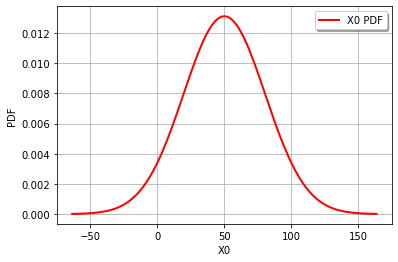

In [12]:
Z = cohesion - 0.25*gravity*height
print('Z becomes a distribution class: ',type(Z),'\n')

beta = Z.getMean()[0]/Z.getStandardDeviation()[0]
pf = Z.computeCDF(0)

print('The reliability index is ',beta)
print('The failure probability is ',pf,'\n')

print('The original distribution for c = ',cohesion)
print('The original distribution for g = ',gravity,'\n')
print('The combined distribution for Z = ',Z)
graph = Z.drawPDF()
view = viewer.View(graph)

In [14]:
Z = cohesion - 0.25*gravity*height
print(cohesion, gravity, Z)

Normal(mu = 100, sigma = 30) Normal(mu = 20, sigma = 2) Normal(mu = 50, sigma = 30.4138)


## Example: reliability of a thingamajig

This is from the April 2021 exam for CIE4130 Probababilistic Design, which is looking at the design of a thingamajig.
The limit-state function is $Z=y-x^{0.5}-2$ where $x\sim$N$(\mu_x=4.0,\sigma_x=0.5)$ and $y\sim$N$(\mu_y=5.0,\sigma_y=0.5)$



Z becomes a distribution class:  <class 'openturns.model_copula.Distribution'> 

The reliability index is  1.947161998215974
The failure probability is  0.025680273921256845 , using P[Z<0], whereas
the failure probability is  0.025757658031434517 , using Phi[-beta]

The original distribution for x =  Normal(mu = 4, sigma = 0.5)
The original distribution for y =  Normal(mu = 5, sigma = 0.5) 

The combined distribution for Z =  RandomMixture(-CompositeDistribution=f(Normal(mu = 4, sigma = 0.5)) with f=[x]->[sqrt(x)] + Normal(mu = 3, sigma = 0.5))


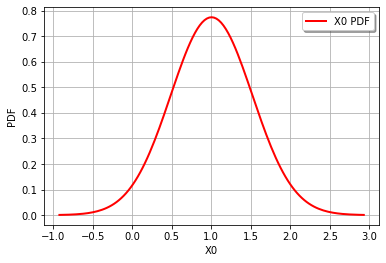

In [15]:
x = ot.Normal(4.0,0.5)
y = ot.Normal(5.0,0.5)
Z = y - x.sqrt() - 2

print('Z becomes a distribution class: ', type(Z), '\n')

beta = Z.getMean()[0]/Z.getStandardDeviation()[0]
pf = Z.computeCDF(0)
pfN = ot.Normal(0,1).computeCDF(-beta)

print('The reliability index is ', beta)
print('The failure probability is ', pf, ', using P[Z<0], whereas')
print('the failure probability is ', pfN, ', using Phi[-beta]\n')

print('The original distribution for x = ', x)
print('The original distribution for y = ', y, '\n')
print('The combined distribution for Z = ', Z)
graph = Z.drawPDF()
view = viewer.View(graph)

## Setting up a function and random vectors

A [random vector][rand-vect] is how a random variable is represented. Each variable has an underlying distribution (or several marginals and a defendence structure). A [`CompositeRandomVector`][rand-compvect] is a function of random variables and is easily defined with the function and `RandomVector` as inputs. There are several options for specifying a function. See the [quick-start guide][fxn-start] and other short exmaples described [here][fxn].

[rand-vect]: https://openturns.github.io/openturns/master/auto_probabilistic_modeling/random_vectors/plot_random_vector_manipulation.html?highlight=random%20vector
[rand-compvect]: https://openturns.github.io/openturns/master/auto_probabilistic_modeling/random_vectors/plot_composite_random_vector.html?highlight=random%20vector
[fxn]: https://openturns.github.io/openturns/master/auto_functional_modeling/index.html#vectorial-functions
[fxn-start]: https://openturns.github.io/openturns/master/auto_functional_modeling/vectorial_functions/plot_quick_start_functions.html#sphx-glr-auto-functional-modeling-vectorial-functions-plot-quick-start-functions-py

### Overview functions

[PythonFunction][fxn-class] is a class in OT which is defined as follows"
```
PythonFunction(nbInputs, nbOutputs, myPythonFunc)
```

where
* `nbInputs`: the number of inputs,
* `nbOutputs`: the number of outputs,
* `myPythonFunc`: a Python function.

Input and outputs are 'vectors' (i.e., 1D objects), but inputs are restricted to the OT Point class: `y = myPythonFunc(x)`, thus
```
def myPythonFunc(x):
    [...]
    return y
```
Vectorizing the function allows all the points in a sample to be evaluated without making a for loop, but requires conversion to a numpy array. *Note: it's possible to convert all points for each random variable to lists, but I'm not sure if this is more computationally efficient than converting to a numpy array.*
```
import numpy as np

def myPythonFunc(x):
    x = np.array(x)
    x0 = x[:, 0]
    x1 = x[:, 1]
    
    y0 = mysubfunction1(x0, x1)
    y1 = mysubfunction2(x0, x1)
    
    y = np.vstack(y0, y1)
    
    return y
```

To call a vectorized function, the following `func_sample` option must be set:
```
myfunction = PythonFunction(nbInputs, nbOutputs, func_sample = mySimulator)
```

Symbolic functions can be used to speed up performance and allow derivatives to be computed exactly. The function is defined as follows, with inputs and formulas given as a list of strings:
```
myfunction = SymbolicFunction(list_of_inputs, list_of_formulas)
```

[fxn-class]: https://openturns.github.io/openturns/master/user_manual/_generated/openturns.PythonFunction.html

### Python function and vectorized Python function example

First a Python function. A few notes to remember:
* vectorize input, vector out
* can speed up calculations by allowing the function to take a Sample
* Samples can only handle addition and multiplication, otherwise need numpy (thus only vectorize if calculation is worth the overhead of numpy array conversion; see `myLSF2`)
* for vectorized functions, use the following option to enable evaluation with a sample, as opposed to a point: `func_sample = myfun`


Running the two functions below took longer for the vectorized one. Probably because the vector needed to be converted to array and saved.

In [18]:
import time
import numpy as np

# define marginals
x = ot.Normal(4.0, 0.5)
y = ot.Normal(5.0, 0.5)

# multivariate distribution (with independent marginals)
inputDistribution = ot.ComposedDistribution((x, y))
# random vector for generating realizations
inputRandomVector = ot.RandomVector(inputDistribution)

# define the limit-state function
def myLSF(x):
    Z = x[1] - x[0]**0.5 - 2
    y = [Z]
    return y

# create the function of random variables
myfunction = ot.PythonFunction(2, 1, myLSF)
outputvector = ot.CompositeRandomVector(myfunction, inputRandomVector)

# sample
montecarlosize = 10000
t1 = time.time()
outputSample = outputvector.getSample(montecarlosize)
t2 = time.time()

print('Sample mean = ', outputSample.computeMean()[0])
print('Sample stdv = ', outputSample.computeStandardDeviation()[0, 0])
print('calculation took ', t2-t1, ' seconds')

# now create a vectorized function, which requires numpy arrays
def myLSF2(x):
    x = np.array(x)
    Z = x[:, 1] - x[:, 0]**0.5 - 2
    y = np.vstack(Z)
    return y

# create the vectorized Python function using the func_sample option
myfunctionVect = ot.PythonFunction(2, 1, func_sample = myLSF2)
#it is easy to enable the history, but expensive for computation time
#myfunction = ot.MemoizeFunction(myfunction)
outputvector2 = ot.CompositeRandomVector(myfunctionVect, inputRandomVector)

#sample
t1 = time.time()
outputSample2 = outputvector2.getSample(montecarlosize)
t2 = time.time()

print('Sample mean = ', outputSample2.computeMean()[0])
print('Sample stdv = ', outputSample2.computeStandardDeviation()[0, 0])
print('calculation took ', t2 - t1, ' seconds')
# note the way std dev was accessed - as a matrix!

Sample mean =  1.0144595929476583
Sample stdv =  0.524804927305712
calculation took  0.059850454330444336  seconds
Sample mean =  1.0124297386094485
Sample stdv =  0.5211331101231553
calculation took  0.03390836715698242  seconds


It is easy to record and view function inputs and outpus using the function history in the `MemoizeFunction` class (see Quick-start page). Don't run it with large samples, though it goes very slow!

### Symbolic function example

Using the Thingamajig example from above.

[Symbolic example page][symbolic] and [API page][API-symbolic] with list of available functions.

[symbolic]: https://openturns.github.io/openturns/master/auto_functional_modeling/vectorial_functions/plot_symbolic_function.html
[API-symbolic]: https://openturns.github.io/openturns/master/user_manual/_generated/openturns.SymbolicFunction.html?highlight=symbolic%20function#openturns.SymbolicFunction

Sample mean = 1.012
Sample stdv = 0.526

The derivatives are: 
| d(y0) / d(x1) = -0.5*x1^-0.5
| d(y0) / d(x2) = 1



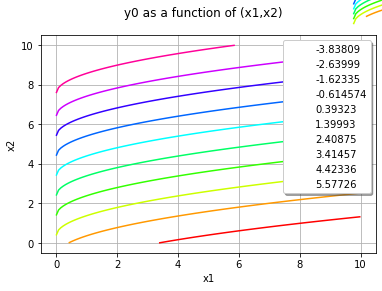

[4.0, 5.0]
[2.83683,5.16317]
[3.83683,6.16317]


In [21]:
# define marginals
x1 = ot.Normal(4.0, 0.5)
x2 = ot.Normal(5.0, 0.5)

# multivariate distribution (with independent marginals)
inputDistribution = ot.ComposedDistribution((x1,x2))
# random vector for generating realizations
inputRandomVector = ot.RandomVector(inputDistribution)

# define the limit-state function
myfunction = ot.SymbolicFunction(['x1','x2'],['x2-x1^0.5-2'])


# create the function of random variables
outputvector = ot.CompositeRandomVector(myfunction,inputRandomVector)

# sample
montecarlosize = 1000
outputSample = outputvector.getSample(montecarlosize)

print('Sample mean = {:.3f}'.format(outputSample.computeMean()[0]))
print('Sample stdv = {:.3f}'.format(outputSample.computeStandardDeviation()[0, 0]))

print('\nThe derivatives are:',myfunction.getGradient())
graph = myfunction.draw(0, 1, 0, [6, 3], [0, 0], [10, 10])
                        #[x1.getMean(),x2.getMean()],
                        #,
                        #)
view = viewer.View(graph)
plt.show()

print([x1.getMean()[0], x2.getMean()[0]])
print(x1.computeQuantile([0.01, 0.99]).asPoint())
print(x2.computeQuantile([0.01, 0.99]).asPoint())

This is a short example for creating the history, then clearing it and reprinting with only a few samples.

In [26]:
myfunction = ot.SymbolicFunction(['x', 'y'], ['y-x^0.5-2'])
myfunction = ot.MemoizeFunction(myfunction)
outputvector = ot.CompositeRandomVector(myfunction,inputRandomVector)

# sample
montecarlosize=3
outputSample=outputvector.getSample(montecarlosize)

print('Inputs:\n', myfunction.getInputHistory())

outputs = myfunction.getOutputHistory()
print('Outputs:\n', outputs)
print('Number of evaluations of limit state function: ',
      myfunction.getEvaluationCallsNumber(), '\n')

myfunction.clearHistory()

# sample
montecarlosize=5
outputSample = outputvector.getSample(montecarlosize)

outputs = myfunction.getOutputHistory()
print(f'Clear history, then re-run with {montecarlosize} samples:')
print(outputs)
print('Number of evaluations of limit state function: ',
      myfunction.getEvaluationCallsNumber())

Inputs:
 0 : [ 3.67123 4.544   ]
1 : [ 3.81463 5.04689 ]
2 : [ 4.07537 5.11789 ]
Outputs:
 0 : [ 0.627957 ]
1 : [ 1.09378  ]
2 : [ 1.09914  ]
Number of evaluations of limit state function:  3 

Clear history, then re-run with 5 samples:
0 : [ 0.783121 ]
1 : [ 2.01974  ]
2 : [ 1.38774  ]
3 : [ 1.27963  ]
4 : [ 0.6512   ]
Number of evaluations of limit state function:  8


## Reliability analysis of thingamajig with symbolic function

FORM, SORM algorithms [here][rel-formsorm]

This [page][rel-quick] gives a quick-start guide to reliability analysis.

[rel-quick]: https://openturns.github.io/openturns/master/auto_reliability_sensitivity/reliability/plot_axial_stressed_beam_quickstart.html
[rel-formsorm]: https://openturns.github.io/openturns/master/auto_reliability_sensitivity/reliability/plot_estimate_probability_form.html#sphx-glr-auto-reliability-sensitivity-reliability-plot-estimate-probability-form-py


In [27]:
# define marginals
x1=ot.Normal(4.0,0.5)
x2=ot.Normal(5.0,0.5)

# multivariate distribution (with independent marginals)
inputDistribution = ot.ComposedDistribution((x1,x2))
inputDistribution.setDescription(['x1','x2'])

# random vector for generating realizations
inputRandomVector = ot.RandomVector(inputDistribution)

# define the limit-state function
myfunction = ot.SymbolicFunction(['x1','x2'],['x2-x1^0.5-2'])

# create the function of random variables
G = ot.CompositeRandomVector(myfunction,inputRandomVector)
failureevent = ot.ThresholdEvent(G,ot.Less(),0)
failureevent.setName('Thingamajig failure')

optimAlgo = ot.Cobyla()
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)

algo = ot.FORM(optimAlgo, failureevent, inputDistribution.getMean())
algo.run()
result = algo.getResult()

pf = 0.026
beta = 1.942
[0.458757,-1.88691]
[4.22938,4.05655]


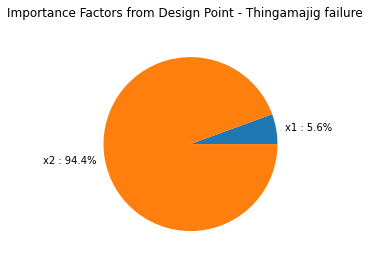

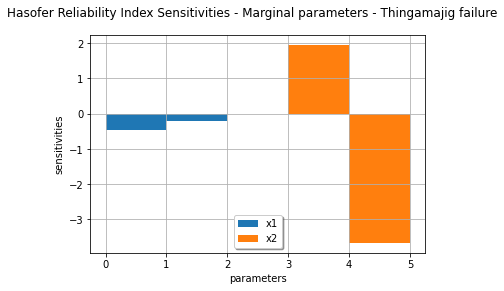

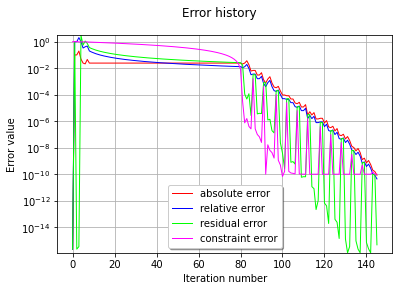

In [28]:
print('pf = {:.3f}'.format(result.getEventProbability()))
print('beta = {:.3f}'.format(result.getHasoferReliabilityIndex()))
print(result.getStandardSpaceDesignPoint())
print(result.getPhysicalSpaceDesignPoint())

graph = result.drawImportanceFactors()
view = viewer.View(graph)

marginalSensitivity, otherSensitivity = result.drawHasoferReliabilityIndexSensitivity()
marginalSensitivity.setLegends(['x1','x2'])
marginalSensitivity.setLegendPosition('bottom')
view = viewer.View(marginalSensitivity)

optimResult = result.getOptimizationResult()
graphErrors = optimResult.drawErrorHistory()
graphErrors.setLegendPosition('bottom')
graphErrors.setYMargin(0.0)
view = viewer.View(graphErrors)